  # Python programming session

  ## Scikit-learn

  ### This content is mainly based on these tutorials:
  * https://github.com/justmarkham/scikit-learn-videos/
  * https://github.com/jakevdp/sklearn_tutorial/
  * http://scikit-learn.org

 #### Documentation available at https://scikit-learn.org/stable/documentation.html

  ### Preliminaries

  Packages:

  * Python version 3.4+
  * numpy version 1.8 or later: http://www.numpy.org/
  * scipy version 0.15 or later: http://www.scipy.org/
  * matplotlib version 1.3 or later: http://matplotlib.org/
  * scikit-learn version 0.15 or later: http://scikit-learn.org
  * ipython/jupyter version 3.0 or later, with notebook support: http://ipython.org

In [1]:
import numpy as np
print('numpy:', np.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

import IPython
print('IPython:', IPython.__version__)


numpy: 1.17.2
scipy: 1.3.1
matplotlib: 3.1.1
scikit-learn: 0.21.3
IPython: 7.9.0


  ### Scikit-learn is a rich suite of tools for machine learning

  * It includes
      * Tools for datasets loading and manipulation
      * Data preprocessing pipelines
      * Metrics
      * A vast collection of machine learning algorithms

  * Built on NumPy (Numerical Python), SciPy (Scientific Python), and matplotlib

  [Source: http://scikit-learn.org/stable/ ]

  ### Algorithms

 #### Supervised learning:

  * Linear models (Ridge, Lasso, Elastic Net, ...)
  * Support Vector Machines
  * Tree-based methods (Random Forests, Bagging, GBRT, ...)
  * Nearest neighbors
  * Neural networks (basics)
  * Gaussian Processes
  * Feature selection


 #### Unsupervised learning:

  * Clustering (KMeans, Ward, ...)
  * Matrix decomposition (PCA, ICA, ...)
  * Density estimation
  * Outlier detection


 #### Model selection and evaluation:

  * Cross-validation
  * Grid-search
  * Lots of metrics

  And many more...

  [Source: http://scikit-learn.org/dev/modules/classes.html]

  ### Let's start with the iris dataset

  It consists of measurements of three different species of irises (setosa, versicolor and virginica)

'Iris Setosa'

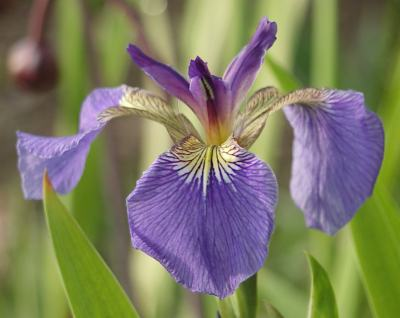

'Iris Versicolor'

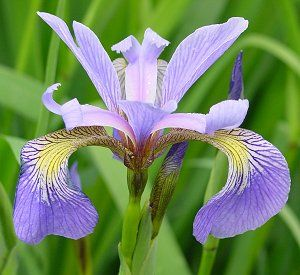

'Iris Virginica'

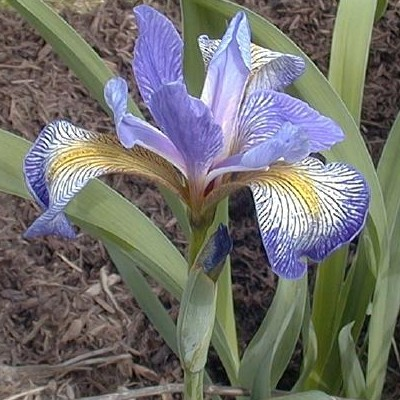

In [2]:
from IPython.display import Image, display
display("Iris Setosa")
display(Image(filename='images/iris_setosa.jpg'))

display("Iris Versicolor")
display(Image(filename='images/iris_versicolor.jpg'))

display("Iris Virginica")
display(Image(filename='images/iris_virginica.jpg'))


  ### Iris dataset
  * 50 samples per type of iris (150 samples total)
  * Measurements / "Features": sepal length, sepal width, petal length, petal width

'Iris'

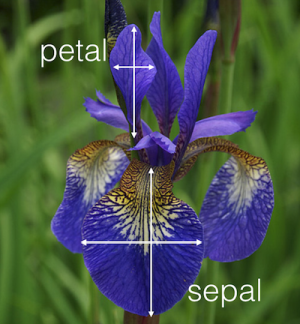

In [3]:
display("Iris")
display(Image(filename='images/iris.png'))




In [4]:
import requests, csv

CSV_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        print(row)
        
# Format: (sepal_length, sepal_width, petal_lengt, petal_width, iris type)


['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.0', '1.4', '0.2', 'Iris-setosa']
['4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
['4.6', '3.1', '1.5', '0.2', 'Iris-setosa']
['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']
['5.4', '3.9', '1.7', '0.4', 'Iris-setosa']
['4.6', '3.4', '1.4', '0.3', 'Iris-setosa']
['5.0', '3.4', '1.5', '0.2', 'Iris-setosa']
['4.4', '2.9', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.1', '1.5', '0.1', 'Iris-setosa']
['5.4', '3.7', '1.5', '0.2', 'Iris-setosa']
['4.8', '3.4', '1.6', '0.2', 'Iris-setosa']
['4.8', '3.0', '1.4', '0.1', 'Iris-setosa']
['4.3', '3.0', '1.1', '0.1', 'Iris-setosa']
['5.8', '4.0', '1.2', '0.2', 'Iris-setosa']
['5.7', '4.4', '1.5', '0.4', 'Iris-setosa']
['5.4', '3.9', '1.3', '0.4', 'Iris-setosa']
['5.1', '3.5', '1.4', '0.3', 'Iris-setosa']
['5.7', '3.8', '1.7', '0.3', 'Iris-setosa']
['5.1', '3.8', '1.5', '0.3', 'Iris-setosa']
['5.4', '3.4', '1.7', '0.2', 'Iris-setosa']
['5.1', '3.7', '1.5', '0.4', 'Iris-setosa']
['4.6', '3.6', '1.0', '0.2', 'Ir

  ### Machine Learning on the iris dataset
  #### Supervised learning problem:
  * #### Predict the type of an iris given its measurements

  ![Data Layout](images\data-layout.png)

  (Figure from the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook))


  - Features in the Iris dataset:

    1. sepal length in cm
    2. sepal width in cm
    3. petal length in cm
    4. petal width in cm

  - Target classes to predict:

    1. Iris Setosa
    2. Iris Versicolour
    3. Iris Virginica

  ``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays.

In [5]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# get "bunch" object containing iris dataset
iris = load_iris()



In [6]:
# headers
iris.keys()




dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
# Data shape
n_samples, n_features = iris.data.shape
print(type(iris.data))
print("Dataset shape:", (n_samples, n_features))

# First dataset element
print("First dataset element:", iris.data[0])

# Class of the first dataset element
print("First dataset element's class:", iris.target[0])




<class 'numpy.ndarray'>
Dataset shape: (150, 4)
First dataset element: [5.1 3.5 1.4 0.2]
First dataset element's class: 0


In [8]:
# Class names
print("Classes: ", iris.target_names)


Classes:  ['setosa' 'versicolor' 'virginica']


  ### Data visualization
  Although the data is four dimensional, we can visualize two dimensions at a time using a scatter-plot

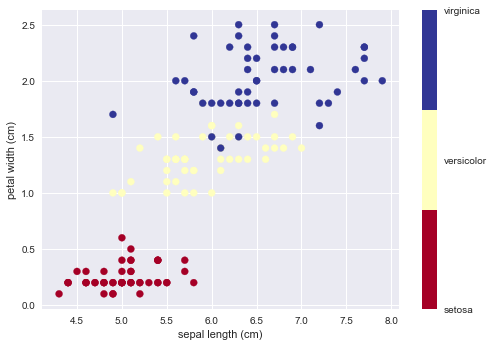

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

x_index = 0
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);


  ### Principal Component Analysis (PCA)  visualization

  #### A technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and to visualize.

  [Reference: http://setosa.io/ev/principal-component-analysis/]

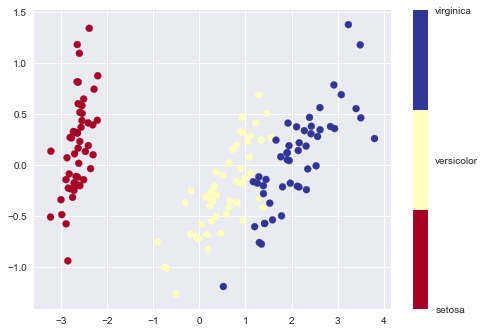

In [13]:
from sklearn.decomposition import PCA

model = PCA(2)
X = model.fit_transform(iris.data)

plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap = plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter);


 #### Centering all distributions and plotting the principal components shows the most important directions of the data.
 #### Remember the principal components are computed from the 4D space and just transformed into 2D for visualization purpose.

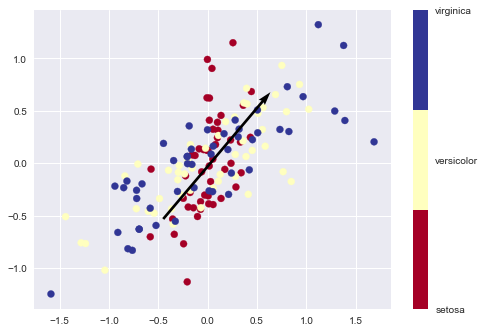

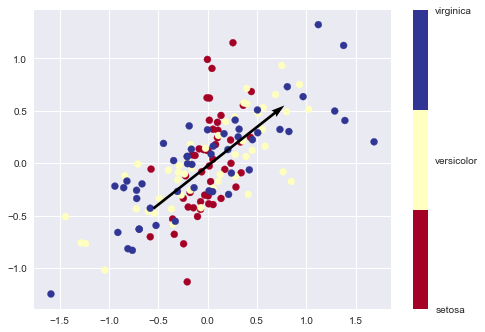

In [14]:
from sklearn.preprocessing import StandardScaler

# get the principal components
principal_axes = model.components_
# transform principal components to 2D
principal_axes_2d = model.transform(principal_axes)

# scale data within their class, i.e. separately from the other classes, to better see the directions of the different distributions
X_mean_0 = np.zeros_like(X)
for i in range(3):
    mask = (iris.target == i)
    X_mean_0[mask] = StandardScaler(with_mean=True, with_std=False).fit_transform(X[mask])

# plot the mean-corrected data and the principal components
plt.scatter(X_mean_0[:, 0], X_mean_0[:, 1], c=iris.target, cmap = plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.quiver(0-abs(principal_axes_2d[0, 0])/10.0, 0-abs(principal_axes_2d[0, 1])/10.0, abs(principal_axes_2d[0, 0]), abs(principal_axes_2d[0, 1]), scale=15)
plt.show()

plt.scatter(X_mean_0[:, 0], X_mean_0[:, 1], c=iris.target, cmap = plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.quiver(0-abs(principal_axes_2d[1, 0])/10.0, 0-abs(principal_axes_2d[1, 1])/10.0, abs(principal_axes_2d[1, 0]), abs(principal_axes_2d[1, 1]), scale=15)
plt.show()


  ### 3 steps for modeling pattern in Scikit-learn
  1. #### Load and preprocess the data
  2. #### Train and evaluate the model/estimator("Estimator" is scikit-learn's term for model)
  3. #### Predict on some new data

In [15]:
# 1.1 Load the data
from sklearn.datasets import load_iris

iris = load_iris()

# Feature matrix
all_X = iris.data
# Target vector
all_y = iris.target


# 1.2 Preprocess the data
# Split the data using scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_X, all_y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(112, 4) (38, 4) (112,) (38,)


  ### Support Vector Machines (SVM)

In [16]:
# 2.1  Import the model you want to use. 
# Support Vector Machines
from sklearn import svm

# 2.2 Instanciate the estimator
classifier = svm.SVC()
print(classifier)




SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [17]:
# 2.3 Train the model using the fuction fit
classifier.fit(X_train, y_train)




/home/users2/schmidmn/arbeitsdaten/venvs/teaching/dl201920/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
# 2.3 Evaluate our model
accuracy = classifier.score(X_test, y_test)
print("Model accuracy:", accuracy*100)



Model accuracy: 94.73684210526315


In [21]:
# 3. Make predictions

print(classifier.predict(X_test[10:15]))
print(y_test[10:15])


[2 0 1 2 2 0 1 1 1 1 0 0 2 1 0 0 0 0 0 0]
[2 0 1 2 2 0 1 2 1 1 0 0 2 1 0 0 0 0 0 0]


  ### Extra step: Save and load the model

In [22]:
# Save the model
from sklearn.externals import joblib
joblib.dump(classifier, 'svm_model.joblib');




/home/users2/schmidmn/arbeitsdaten/venvs/teaching/dl201920/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [23]:
# Load the model
clf = joblib.load('svm_model.joblib')

clf.predict(X_test[10:15])


array([0, 0, 2, 1, 0])

  ### K-nearest neighbors (KNN)

In [24]:
# import the estimator
from sklearn.neighbors import KNeighborsClassifier

# instanciate the estimator
# hyperparameters: n_neighbors is k
k = 1
knn = KNeighborsClassifier(n_neighbors=k)

# Model training
knn.fit(X_train, y_train)

# Model evaluation
accuracy = knn.score(X_test, y_test)
print("Model accuracy:", accuracy*100)

# Model prediction
knn.predict(X_test[10:15])


Model accuracy: 94.73684210526315


array([0, 0, 2, 1, 0])

  #### Using a different value for k

In [25]:
k = 20
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print("Model accuracy:", accuracy*100)
knn.predict(X_test[10:15])


Model accuracy: 94.73684210526315


array([0, 0, 2, 1, 0])

  ### Logistic Regression

In [28]:
# import the estimator
from sklearn.linear_model import LogisticRegression

# instanciate the estimator
logreg = LogisticRegression(C=10)

# Model training
logreg.fit(X_train, y_train)

# Model evaluation
accuracy = logreg.score(X_test, y_test)
print("Model accuracy:", accuracy*100)

# Model prediction
logreg.predict(X_test[10:15])


Model accuracy: 100.0


/home/users2/schmidmn/arbeitsdaten/venvs/teaching/dl201920/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/users2/schmidmn/arbeitsdaten/venvs/teaching/dl201920/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([0, 0, 2, 1, 0])

  ### Classifier comparison

  [Source http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html]

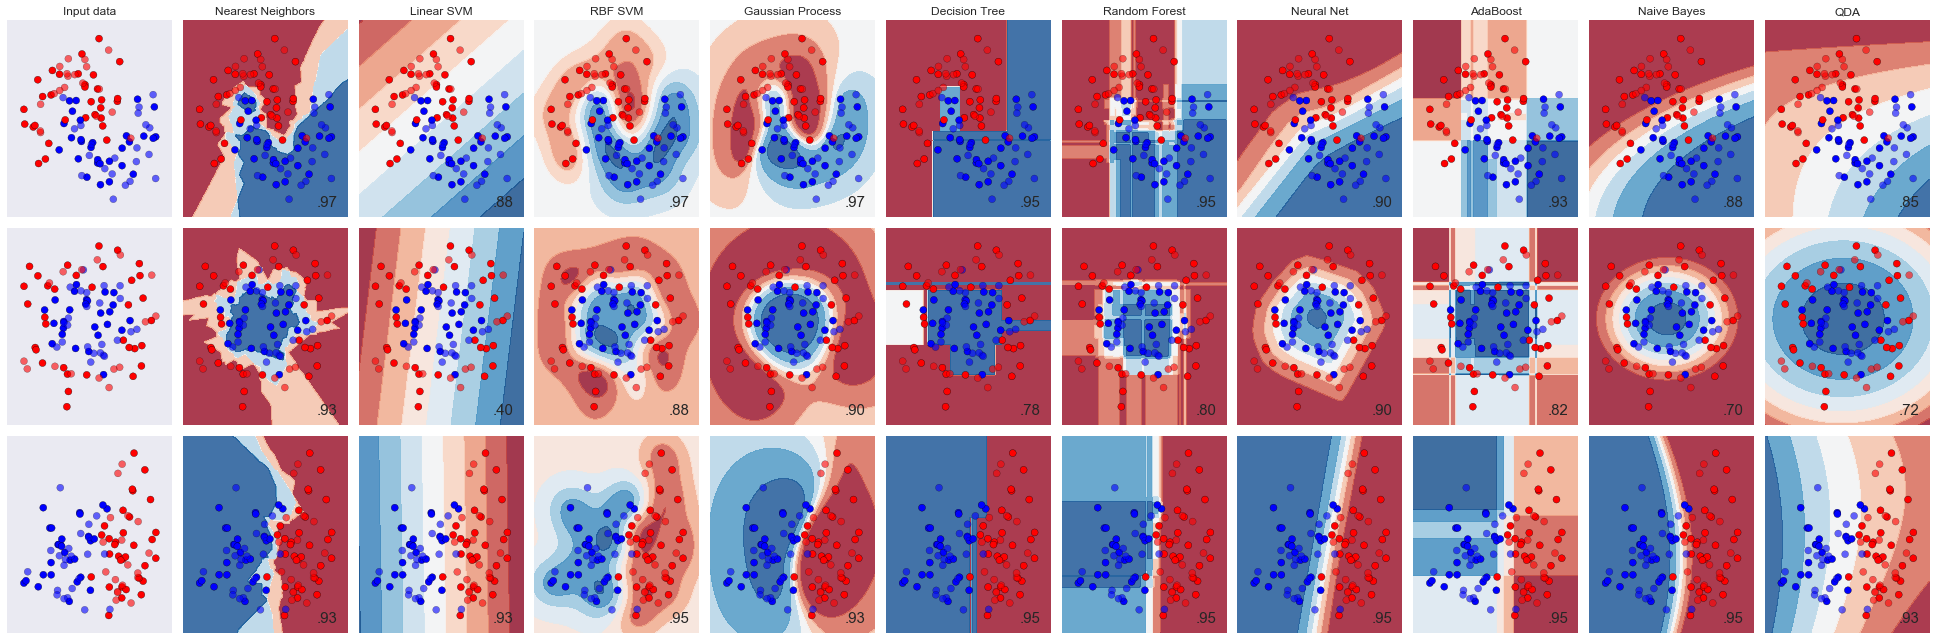

In [29]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# Estimators
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    #Radial basis function 
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=500),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


# Generate a random n-class classification problem
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

# Random seed
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()


  ## Unsupervised learning

  ### Clustering - K-Means

  - An algorithm that finds clusters in data based on the data attributes alone (not the labels).

  - It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

  [Source https://github.com/jakevdp/sklearn_tutorial/blob/master/notebooks/04.2-Clustering-KMeans.ipynb]


In [ ]:
# Importing the make_blobs (makes a number of isotropic Gaussian blobs for clustering)

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);




In [ ]:
# Importing Kmeans, then training and prediction
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');


  ## KMeans for Digits

  #### Task: Cluster 64- dimensional vectors that represent digits and look at the cluster centers

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()


fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(digits.data[i].reshape((8, 8)), cmap=plt.cm.binary)
      
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(digits.data[i+10].reshape((8, 8)), cmap=plt.cm.binary)



In [ ]:
# take a look on the data
print(digits['data'][0])



In [ ]:
# Create, train the model
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)

est.cluster_centers_.shape


  #### We see ten clusters in 64 dimensions. Let's visualize each of these cluster centers to see what they represent

In [ ]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)


  ### Let's use PCA to visualize our clusters

In [ ]:
# Fixing permutation (i.e. choosing the label from the majority of the target data (regarding the index) as new label)
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]


from sklearn.decomposition import PCA
X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');


  ### Let's see how accurate is K-means classifier with no labels

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(digits.target, labels)
print("K-means accuracy: ", acc*100)


  ### Confusion matrix
  #### Table used to describe  a classifier performance on a set of test data for which the true values are known

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');


  ## Comparing different clustering algorithms
  [Source http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html]

In [ ]:

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),10)))

    plt.subplot(len(datasets), len(clustering_algorithms)+1, plot_num)
    if i_dataset == 0:
        plt.title("Dataset", size=18)
    plot_num += 1
    if y is None:
        y = 0
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms)+1, plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

